<a href="https://colab.research.google.com/github/RDLL/curso_mineria_de_datos/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento de Datos
## Tarea 5
## Análisis de Componentes Principales

In [1]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=0a79edcbf3c7e1cfdb9e64df23c9c3bf95bbaea406076317b9da7f46091869f3
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [76]:
#Tratamiento de datos
#====================================
import pandas as pd
import numpy as np

#Graficos
#====================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Preprocesado y análisis
#====================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/RDLL/curso_mineria_de_datos/main/Cars93.csv')
df.head(n=10)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [25]:
means = df.mean(numeric_only=True).to_dict()
columns = []
i=0
for c in df.columns:
  t = str(df[c].dtype)
  if "int" in t or "float" in t:
    columns.append(c)
    df[c] = df[c].fillna(means[c])

In [71]:
numericdata = df[columns].copy()
x = stats.zscore(numericdata,axis=0)
df[columns] = df[columns].replace(df[columns].values,x[columns].values)
y = df['Model']

In [72]:
pca = PCA(n_components=18)
pca.fit(x)
print(pca.explained_variance_)

[7.98484697 1.58859354 1.54800128 1.27841722 1.09768922 0.91225036
 0.79037062 0.71628133 0.60743394 0.43628627 0.32731108 0.24570113
 0.22934718 0.17403469 0.10341924 0.09043987 0.03789963 0.0273286 ]


In [73]:
pca = PCA(n_components=4)
pca.fit(x)
print(pca.explained_variance_ratio_)

[0.43883269 0.08730622 0.08507534 0.07025949]


In [74]:
pca = PCA(n_components=18)
pca.fit(x)
print(pca.explained_variance_ratio_)

[0.43883269 0.08730622 0.08507534 0.07025949 0.06032701 0.05013562
 0.04343733 0.03936552 0.03338347 0.0239775  0.01798842 0.01350329
 0.0126045  0.00956463 0.00568373 0.00497041 0.00208289 0.00150193]


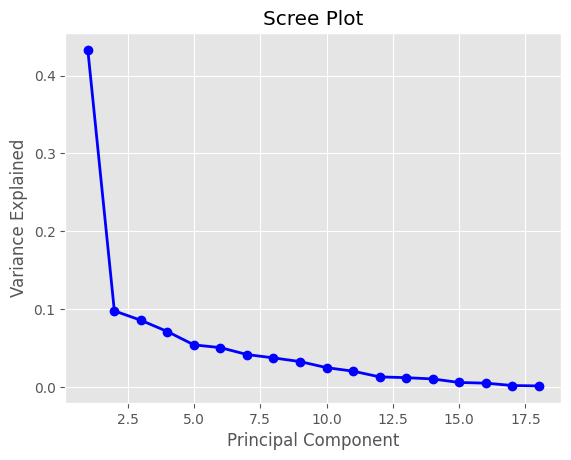

In [48]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [103]:
x_scaled = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2'])

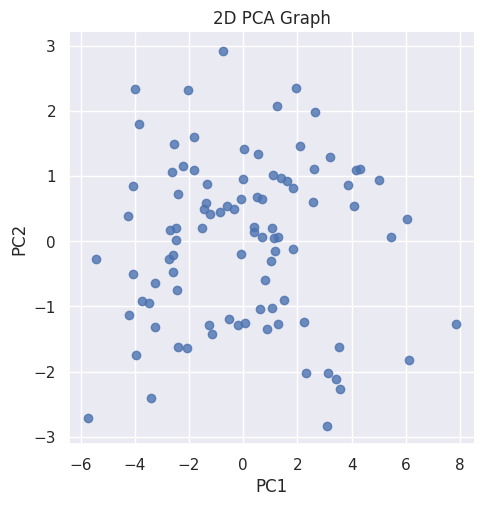

In [104]:
sns.set()

sns.lmplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    fit_reg=False,
    legend=True
    )

plt.title('2D PCA Graph')
plt.show()

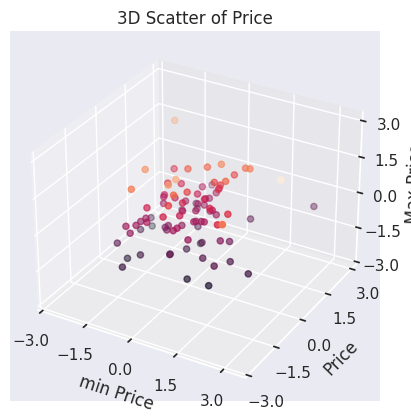

In [106]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot scaled features
xdata = x_scaled[:,0]
ydata = x_scaled[:,1]
zdata = x_scaled[:,2]

# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata)

# Plot title of graph
plt.title(f'3D Scatter of Price')

# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# Plot x, y, z labels
ax.set_xlabel('min Price', rotation=150)
ax.set_ylabel('Price')
ax.set_zlabel('Max Price', rotation=60)
plt.show()